#### Based of
https://github.com/dataforgoodfr/Bloom/blob/data-science/data_science/notebooks/20230212_bloom_exploration_mathilde.ipynb

## Installing packages

In [1]:
pip install -r ../requirements.txt

Looking in indexes: http://build-nexus.prod.crto.in/repository/moab.pypi/simple
Note: you may need to restart the kernel to use updated packages.


## Importing packages

In [4]:
import pandas as pd
import geopandas as gpd
%matplotlib inline

## Path to Shapefile

In [26]:
data_root = "../data"
path_root = f'{data_root}/WDPA_jan2023/'

In [239]:
## read shapefile using geopandas library

In [6]:
def shp_file_to_df(path_root: str, folder: str, file_name: str) -> pd.DataFrame:
    
    full_path = path_root + folder + '/'+ file_name
    
    df = gpd.GeoDataFrame.from_file(full_path)
    
    return df

## Get the polygons

### 1. Polygons_1

In [7]:
%%time
df1 = shp_file_to_df(path_root, 'WDPA_Jan2023_Public_shp_0', 'WDPA_Jan2023_Public_shp-polygons.shp')

CPU times: user 2min 20s, sys: 3.24 s, total: 2min 23s
Wall time: 2min 27s


In [8]:
# inspect crs
df1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

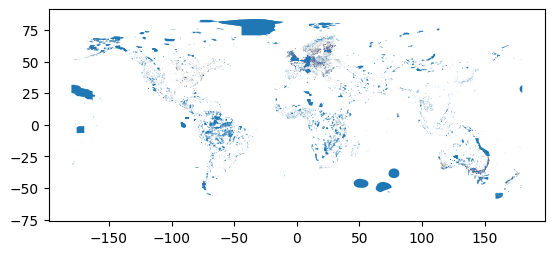

In [10]:
df1.plot()

### 2. Polygons_2

In [11]:
%%time
df2 = shp_file_to_df(path_root,'WDPA_Jan2023_Public_shp_1','WDPA_Jan2023_Public_shp-polygons.shp')

CPU times: user 3min 29s, sys: 15.7 s, total: 3min 45s
Wall time: 4min 7s


### 3. Polygons_3

In [12]:
# inspect crs
df2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

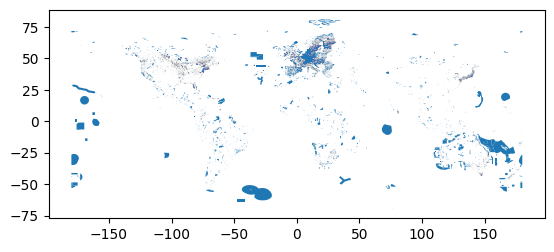

In [13]:
df2.plot()

In [14]:
%%time
df3 = shp_file_to_df(path_root,'WDPA_Jan2023_Public_shp_2','WDPA_Jan2023_Public_shp-polygons.shp')

CPU times: user 3min 3s, sys: 22.2 s, total: 3min 25s
Wall time: 3min 47s


In [15]:
# inspect crs
df3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

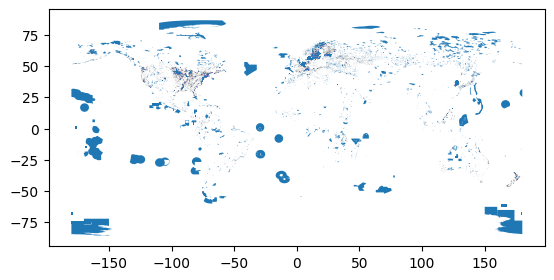

In [16]:
df3.plot()

#### --> DFs have the same CRS (CRS: EPSG:4326)

## Concat & inspect

In [17]:
df = pd.concat([df1, df2, df3]).drop_duplicates()
#there were several index = 0, 1, 2 etc... so reset index is needed
df.reset_index(inplace=True)
df.shape

(273261, 31)

In [18]:
df.head(2)

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,geometry
0,1.0,1,1,Diamond Reef and Salt Fish Tail Reef,Diamond Reef,Marine Reserve,Marine Reserve,National,Ia,Not Applicable,...,Fisheries Division,Not Reported,State Verified,1807,AG-04,ATG,ATG,Not Applicable,Not Applicable,"POLYGON ((-61.82494 17.18497, -61.82497 17.184..."
1,2.0,2,1,Palaster Reef,Palaster Reef,Marine Reserve,Marine Reserve,National,Ia,Not Applicable,...,Fisheries Division,Not Reported,State Verified,1807,AG-10,ATG,ATG,Not Applicable,Not Applicable,"POLYGON ((-61.74007 17.52001, -61.77174 17.526..."


<Axes: >

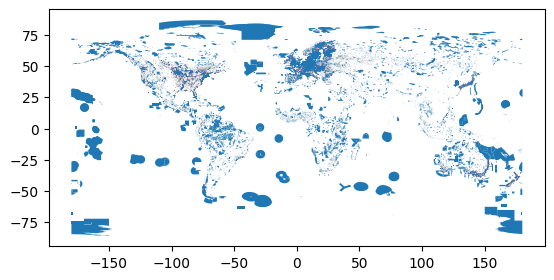

In [19]:
df.plot()

In [20]:
#check which info we have
df.columns

Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'SUPP_INFO', 'CONS_OBJ', 'geometry'],
      dtype='object')

Many of the included polygons are for in-land protected areas.

See quick overview of included area, e.g., from front-cover of the User Manual (https://www.ibat-alliance.org/pdf/wdpa_manual.pdf) or directly from https://www.dropbox.com/s/bqiuqfvkh87ddgq/Screen%20Shot%202023-02-12%20at%209.54.58%20PM.png?dl=1

From pg. 36 of "User Manual for the World Database on Protected Areas and world database on other effective area- based conservation measures: 1.6" (https://www.ibat-alliance.org/pdf/wdpa_manual.pdf):

> "Marine Protected Areas

> The ‘Marine’ field provides an indication of whether a protected area or OECM is located entirely or partially in > the marine environment.
> A value of
> * ‘0’ indicates that there is very little to no marine component,
> * ‘1’ indicates > that the site has substantial marine and terrestrial components and
> * ’2’ indicates that there is very little to no > terrestrial component."

In [21]:
df['MARINE']

0        2
1        2
2        0
3        0
4        0
        ..
91082    0
91083    0
91084    0
91085    0
91086    0
Name: MARINE, Length: 273261, dtype: object

In [22]:
df_nonterr = df[df.MARINE != '0']

In [25]:
print(f"{df.shape[0]} vs {df_nonterr.shape[0]}")

273261 vs 18019


In [27]:
df_nonterr.to_file(f'{data_root}/Nonterr_WDPA_Jan2023_Public_shp-polygons.shp')

<Axes: >

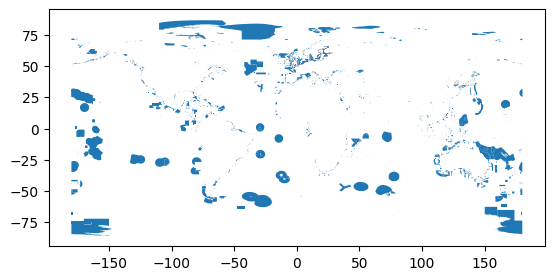

In [28]:
df_nonterr.plot()